# Graph - Depth first search 

#### DFS basics 
- How many levels are there in the recursion tree? What does it store? 
- How many different states should we try to put on each level? (how many branches)

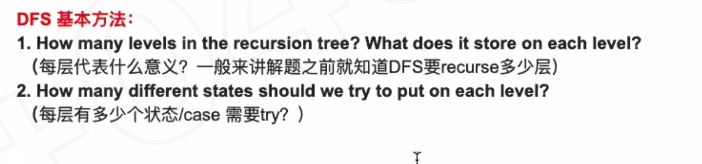

- search space: 

#### Interview tips: 
- first draw the recursion tree and specify the meaning of each layer and how many branches. 
- write code 

$2^n$

## 78. Subsets 
[78. Subsets](https://leetcode.com/problems/subsets/) 

- How many levels are there in the recursion tree? What does it store? 
    - 3 levels, For each level, it makes the decision on whether to put this element into the final set or not. 
- How many different states should we try to put on each level? (how many branches) 
    - 2 branches: select or not  

In [4]:
class Solution:
    def subsets(self, nums): 
        if len(nums) == 0: 
            return [] 
        
        res = [] 
        cur_res = [] 
        
        def dfs(nums, level): 
            # base case 
            if level == len(nums): 
                res.append(cur_res.copy()) 
                return 
            
            cur_res.append(nums[level]) 
            dfs(nums, level + 1) 
            cur_res.pop() 
            
            dfs(nums, level + 1) 
        
        dfs(nums, 0) 
        return res 
# time = O(n * 2^n) 
# space = O(N) 

Concepturally, just analyze on layer. 
```
    def dfs(nums, level): 
        # base case 
        if level == len(nums): 
            res.append(cur_res.copy()) 
            return 

        cur_res.append(nums[level]) 
        # break point, finished and returned to a 
        dfs(nums, level + 1)  
        # we need to remove a 
        cur_res.pop() 
        dfs(nums, level + 1) 
```
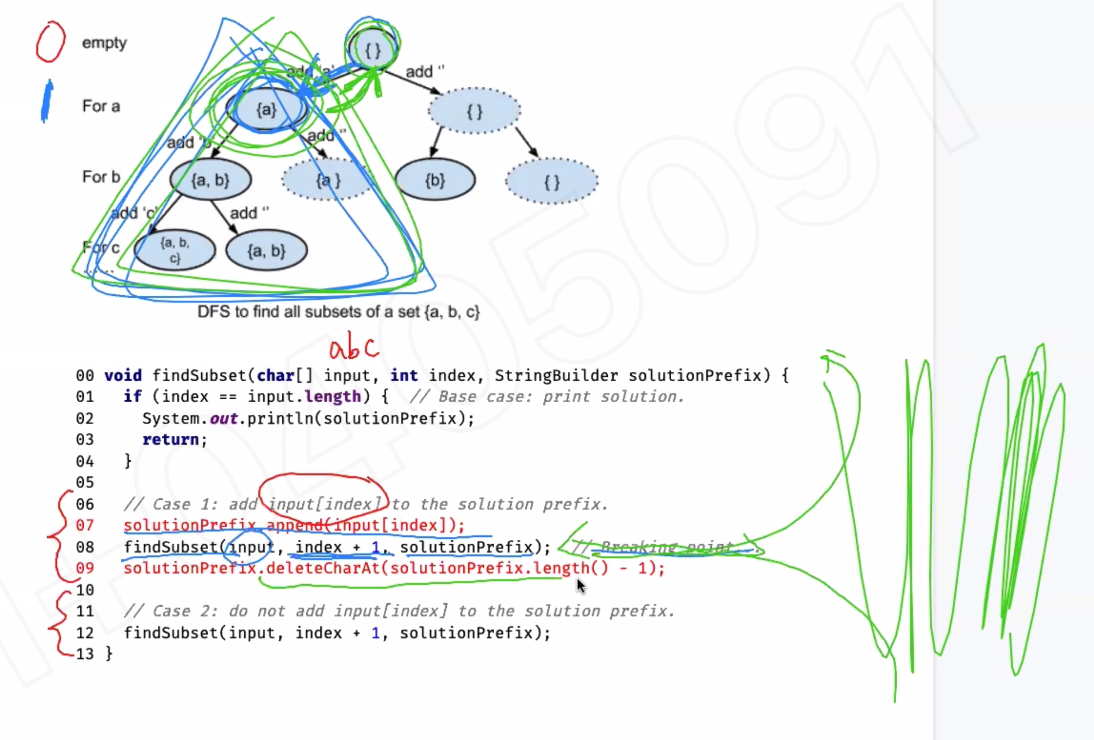

#### for loop version 

In [4]:
class Solution:
    def subsets(self, nums):
        n = len(nums) 
        result = [[]] 
        for num in nums: 
            result += [curr + [num] for curr in result] 
            print(num) 
            print(result)
        
        return result 
            
arr = [1,2,3] 
a = Solution() 
a.subsets(arr) 
result = [[]] 
# result += 

1
[[], [1]]
2
[[], [1], [2], [1, 2]]
3
[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]


In [14]:
class Solution:
    def subsets(self, nums):
        n = len(nums) 
        result = [[]] 
        for num in nums: 
            # generate new candidate in current level 
            curr = [] 
            for ele in result: 
                curr.append(ele + [num]) 
#             result += curr 
            result.extend(curr)
            
        return result 
            
arr = [1,2,3] 
a = Solution() 
a.subsets(arr) 

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

In [13]:
# list concatenation + operator 
lst = [1, 3, 5]
lst2 = [2, 4, 6]
lst += lst2 
print(lst)
lst = []
lst2 = []
lst += lst2 
print(lst)

lst = [4, 6, 8]
lst2 = [10, 12, 14]
lst.extend(lst2)
print(lst)


[1, 3, 5, 2, 4, 6]
[]
[4, 6, 8, 10, 12, 14]


#### dfs backtracking version 

In [20]:
class Solution:
    def dfs(self, nums, S, index): 
        if index == len(nums): 
            self.result.append(list(S))  
            return 
        
        S.append(nums[index]) 
        self.dfs(nums, S, index+1) 
        S.pop() 
        self.dfs(nums, S, index+1) 
    
    def subsets(self, nums):
        n = len(nums) 
        self.result = [] 
        S = [] 
        self.dfs(nums, S, 0)
        
        return self.result 
            
arr = [1,2,3] 
a = Solution() 
a.subsets(arr)


[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]

## 90. Subsets II 
[90. Subsets II](https://leetcode.com/problems/subsets-ii/)

```
1 222 3 


```
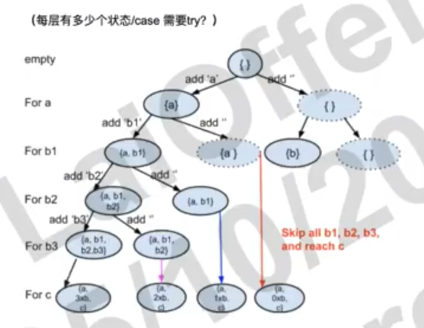

In [55]:
class Solution:
    def subsetsWithDup(self, nums):
        if len(nums) == 0: 
            return [] 
        elif len(nums) == 1: 
            return [[], nums] 
        
        nums_sort = sorted(nums)  
        self.nums_set = set(nums_sort) 
        # print('nums_set', nums_set)
        self.res = [] 
        cur_res = [] 
        self.dfs_dup(nums_sort, 0, cur_res)  
        
        return self.res 
    
    def dfs_dup(self, nums, level, cur_res): 
        
        if level == len(nums): 
            self.res.append(cur_res.copy()) 
            return 
        
        idx_end = level  
        # exit condition: level >= len(nums)-1 or nums[level] != nums[level+1] 
        while idx_end < len(nums) - 1 and nums[idx_end] == nums[idx_end+1]: 
            idx_end += 1
        
        
        num_dup = idx_end - level + 1 
        print('level:', level, 'idx_end:', idx_end, 'num_dup:', num_dup ) 
        print(cur_res)

        
        for i in range(num_dup, -1, -1): 
            cur_res.extend(nums[level:level+i])  
            self.dfs_dup(nums, idx_end + 1, cur_res)
            for _ in range(i): 
                cur_res.pop()  
#                 cur_res = cur_res[:len(cur_res) - i] 
              
    def dfs_ori(self, nums, level, cur_res): 
        
        if level == len(nums): 
            self.res.append(cur_res.copy()) 
            return 
        
        for i in range(1, -1, -1): 
            cur_res.extend(nums[level:level+i])  
            self.dfs_ori(nums, level + 1, cur_res)
            if i != 0: 
                cur_res.pop()  
        
#         self.cur_res.append(nums[level]) 
#         self.dfs_ori(nums, level + 1)
#         self.cur_res.pop() 
#         self.dfs_ori(nums, level + 1)
        
    def dfs(self, nums, level_set, idx_nums_start): 
        
        if level_set == len(self.nums_set): 
            self.res.append(self.cur_res.copy()) 
            return 
        
        idx_end = idx_nums_start  
        # exit condition: level >= len(nums)-1 or nums[level] != nums[level+1] 
        while idx_end < len(nums) - 1 and nums[idx_end] == nums[idx_end+1]: 
            idx_end += 1
        
        for i in range(idx_end - idx_nums_start + 1, -1, -1):   
            self.cur_res.append(nums[idx_nums_start:idx_nums_start+i]) 
            self.dfs(nums, idx_end + 1, level_set + 1)  
            self.cur_res.pop() 
            self.dfs(nums, idx_end + 1, level_set + 1) 

nums = [1,2]  
nums = [1, 2, 2, 1]  

# nums = [1] 

a = Solution() 
a.subsetsWithDup(nums)


level: 0 idx_end: 1 num_dup: 2
[]
level: 2 idx_end: 3 num_dup: 2
[1, 1]
level: 2 idx_end: 3 num_dup: 2
[1]
level: 2 idx_end: 3 num_dup: 2
[]


[[1, 1, 2, 2], [1, 1, 2], [1, 1], [1, 2, 2], [1, 2], [1], [2, 2], [2], []]

In [2]:
num = [1, 2] 
print(num) 
num_2 = [3, 3] 
num.extend(num_2) 
print(num) 
num.remove(2) 
print(num) 
for i in range(1): 
    print(i) 

[1, 2]
[1, 2, 3, 3]
[1, 3, 3]
0


## 77. Combinations 
[77. Combinations](https://leetcode.com/problems/combinations/) 

In [3]:
class Solution:
    def combine(self, n: int, k: int):  
        
        self.n = n + 1 
        index = 1 
        self.res = [] 
        self.k = k 
        self.dfs(index, [] )
        
        return self.res 
        
        
    def dfs(self, index, cur_res): 
        length = len(cur_res)
        if index == self.n and length == self.k:  
            self.res.append(cur_res.copy()) 
            return 
        elif length == self.k: 
            self.res.append(cur_res.copy()) 
            return  
        elif index == self.n: 
            return  
        
        cur_res.append(index) 
        self.dfs(index + 1, cur_res)
        cur_res.pop() 
        self.dfs(index + 1, cur_res) 

## 22. Generate Parentheses 
[22. Generate Parentheses](https://leetcode.com/problems/generate-parentheses/) 


In [5]:
class Solution:
    def generateParenthesis(self, n: int):
        if n == 0: 
            return [] 
        if n == 1: 
            return ['()']
        
        self.result = [] 
        curr = [] 
        self.dfs(n, curr, 0, 0)
        return self.result 
    
    def dfs(self, n, curr, left, right): 
        # base case 
        if len(curr) == 2*n: 
            self.result.append("".join(curr))   
            return
        if left < n: 
            curr.append('(') 
#             left += 1 
            self.dfs(n, curr, left + 1, right) 
            curr.pop() 
#             left -= 1 
        if left > right: 
            curr.append(')') 
            right += 1 
            self.dfs(n, curr, left, right) 
            curr.pop() 
            right -= 1 

    def dfs_failure(self, n, curr, left, right): 
        # base case 
        if len(curr) == 2*n: 
            self.result.append("".join(curr))   
            return 
        elif left < right: 
            return 
        elif left > n: 
            return 
 
        curr.append('(')
        self.dfs(n, curr, left + 1, right) 
        curr.pop() 
        
        curr.append(')')
        self.dfs(n, curr, left, right + 1) 
        curr.pop() 
        

        
    def dfs_half(self, n, curr, left, right): 
        # base case 
        if len(curr) == 2*n: 
            self.result.append("".join(curr))   
            
        # 
        
        if left > right: 
            curr.append('(')
            self.dfs(n, curr, left + 1, right)
        else: 
            pass 
            
      # time: 

In [13]:
hash_set = set() 
hash_set.add(9)

hash_set
hash_set 


{9}

## 46. Permutations 
[46. Permutations](https://leetcode.com/problems/permutations/) 

In [30]:
class Solution:
    def permute(self, nums): 
        self.res = [] 
        if len(nums) <= 1: 
            self.res.append(nums)
            return self.res 
        
        rem_set = set(nums) 
#         for ele in nums: 
#             rem_set.add(ele) 
        
        cur_res = [] 
        
        self.dfs(0, rem_set, cur_res)
        
        return self.res 
        
    def dfs(self, level, rem_set, cur_res): 
        # base case 
        if len(rem_set) == 0:
            self.res.append(cur_res.copy()) 
            return 
            
        # num_branch = len(rem_set) 
        
        # notice: rem_set is changing 
        # need to be fixed 
        for ch in list(rem_set): 
            cur_res.append(ch) 
            rem_set.remove(ch) 
            self.dfs(level+1, rem_set, cur_res) 
            cur_res.pop() 
            rem_set.add(ch) 

            
arr = [1, 2, 3]
# coin_arr = [1,2,5]
# amon = 11
a = Solution() 
res = a.permute(arr) 
for ele in res: 
    print(ele)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


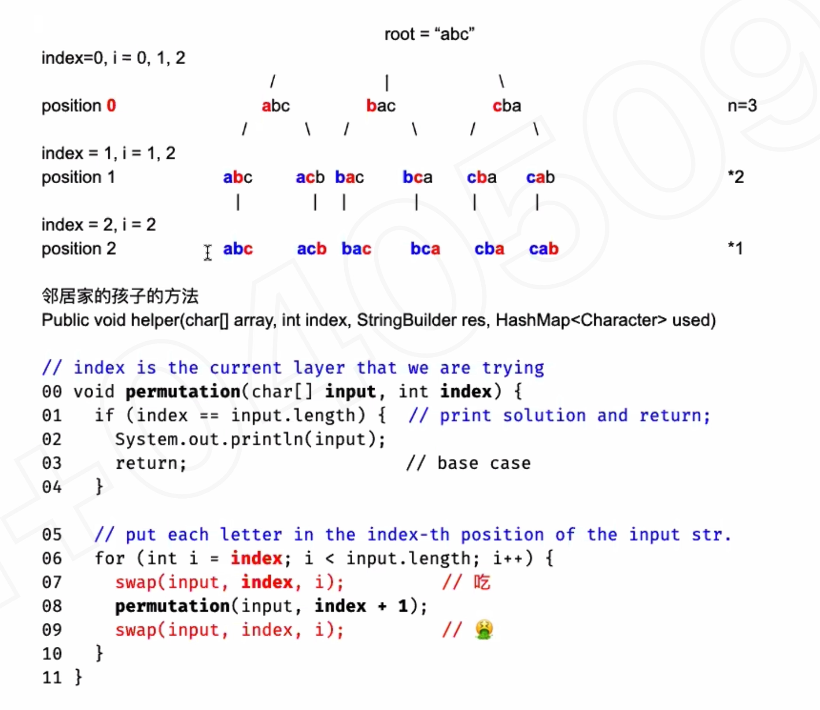

## 47. Permutations II
[47. Permutations II](https://leetcode.com/problems/permutations-ii/) 

In [14]:
class Solution:
    def permuteUnique(self, nums): 
        """
                    1 1 2 
            /          |        \
            1 (1 2)    
        
        if ch in set() 
        """ 
        
        
        self.res = [] 
        self.length = len(nums) 
        
        self.dfs(0, nums)
        
        return self.res 
        
    def dfs(self, level, nums): 
        if level == self.length: 
            self.res.append(nums.copy())
            return 
        visited = set() 
        for i in range(level, self.length): 
            if nums[i] in visited: 
                continue 
            visited.add(nums[i]) 
            nums[i], nums[level] = nums[level], nums[i] 
            self.dfs(level + 1, nums)
            nums[i], nums[level] = nums[level], nums[i] 
            

## 322. Coin Change 
[322. Coin Change](https://leetcode.com/problems/coin-change/) 

In [15]:
class Solution:
    def coinChange(self, coins, amount: int) -> int:
        if amount == 0: 
            return 0 
        
        solution = [0 for _ in range(len(coins))] 
        coins = sorted(coins)
        self.res = float('inf')
        
        
        def dfs(level, money_remain): 
            # base case: 
            if money_remain == 0:  
                self.res = min(self.res, sum(solution[:level]))  
                return 
            
            if level == len(coins): 
                return 
            
            num_branch = money_remain // coins[level] 
            
            
            for i in range(num_branch + 1):  
                solution[level] = i 
                dfs(level + 1, money_remain - i*coins[level])  
                # why no pop: because solution[next level] is overiden 
                
            
        dfs(0, amount) 
        
        return self.res if self.res < 1000000 else -1 
    
    def coinChangeDp(self, coins, amount: int) -> int:
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        
        for coin in coins:
            for x in range(coin, amount + 1):
                dp[x] = min(dp[x], dp[x - coin] + 1)
        return dp[amount] if dp[amount] != float('inf') else -1 
    
coin_arr = [3,7,405,436]
amon = 8839
# coin_arr = [1,2,5]
# amon = 11
a = Solution() 
# ori = a.coinChange(coin_arr, amon) 
# print(ori)
dp = a.coinChangeDp(coin_arr, amon) 
print(dp) 

25


In [10]:
from collections import deque 
stack = deque()  
# stack is None 
if len(stack) == 0:  
    print(4 ** 3) 

64


## 518. Coin Change 2 
[518. Coin Change 2](https://leetcode.com/problems/coin-change-2/)

## 416. Partition Equal Subset Sum 
[416. Partition Equal Subset Sum](https://leetcode.com/problems/partition-equal-subset-sum/)

In [20]:
class Solution:
    def canPartition(self, nums) -> bool: 
        if len(nums) <= 1: 
            return False 
        
        cur_res = [] 
        self.total = sum(nums) 
        if self.total % 2 != 0: 
            return False 
        
        self.target = self.total / 2 
        self.sign = False 
        self.dfs(nums, 0, 0) 
        
        return self.sign 
        
    def dfs(self, nums, level, cur_sum): 
        if cur_sum == self.target: 
            self.sign = True 
            return 
        if level == len(nums): 
            return 
        if self.sign == False: 
            self.dfs(nums, level + 1, cur_sum + nums[level]) 
            self.dfs(nums, level + 1, cur_sum) 
        
arr = [1,5,11,5]  

arr = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,97]
# print(len(arr_2))
print(arr[180:], len(arr[180:]))
arr[-1] = 100 
a = Solution() 
# a.canPartition(arr[160:]) 
a.canPartition(arr[:]) 



[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 97] 20


False

In [1]:
n = 3 
n / 2 

1.5

## 254. Factor Combinations 
[254. Factor Combinations](https://leetcode.com/problems/factor-combinations/) 

In [ ]:
class Solution:
    def getFactors(self, n: int): 
        """
                root = 12 
                
        l0  6     0 * 6 (rem = 12)    1 *6   rem = 2 
        
        l1  4     
        
        l2   3 
         
        l3   2 

        # 1. get all the factors (linear scan, mod ) 
        2. dfs 
            a. at each level, we consider each factor 
            b. dynamically calculate how many branches 
         
        """ 
        self.res = [] 
        if n <= 2: 
            return [] 
        
        factors = self.get_factor(n)  
        if len(factors) == 0: 
            return [] 
        # print(factors) 
        
        self.total_factor = len(factors) 
        # num = self.get_num_branch(24, 3)
        # print(num)
        
        # dfs 
        self.dfs([], factors, n, 0, n)
        
        
        return self.res 
    
    def dfs(self, cur_res, factors, n, level, rem): 
        if rem == 1: 
            self.res.append(cur_res.copy())
            return 
            
            
        if level == self.total_factor: 
            # todo record current result 
            return 
        
        num_branch = self.get_num_branch(rem, factors[level]) 
        
        # rem // factors[level] 
        
        # 24 -- 3 : 3 * 3 
        
        for i in range(num_branch): 
            if rem % (factors[level] ** i) == 0: 
                
                remain = rem // (factors[level] ** i) 
                for _ in range(i): 
                    cur_res.append(factors[level]) 
                self.dfs(cur_res, factors, n, level + 1, remain)
                for _ in range(i): 
                    cur_res.pop()  
                 
            
    def get_num_branch(self, rem, factor): 
        if rem <= 1: 
            return 1
        res = 0 
        for i in range(rem):  
            if factor ** i <= rem: 
                res += 1 
            else: 
                break 

        return res 
        
    
    def get_factor(self, n): 
        # returns a list of all factors of n   
        res = []  
        for i in range(2, n): 
            if n % i == 0: 
                res.append(i) 
        
        return res 
        